<a href="https://colab.research.google.com/github/juliass255/MapBiomas/blob/main/Analise_Mapbiomas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
with pd.ExcelFile('/content/mapbiomas.xlsx') as xlsx:
  df = pd.read_excel(xlsx,'COBERTURA_COL8.0')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   feature_id     889 non-null    int64  
 1   biome          889 non-null    object 
 2   state          889 non-null    object 
 3   biome [state]  889 non-null    object 
 4   class_id       889 non-null    int64  
 5   level_0        889 non-null    object 
 6   level_1        889 non-null    object 
 7   level_2        889 non-null    object 
 8   level_3        889 non-null    object 
 9   level_4        889 non-null    object 
 10  color          857 non-null    object 
 11  1985           796 non-null    float64
 12  1986           802 non-null    float64
 13  1987           796 non-null    float64
 14  1988           799 non-null    float64
 15  1989           803 non-null    float64
 16  1990           801 non-null    float64
 17  1991           804 non-null    float64
 18  1992      

In [ ]:
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   feature_id     889 non-null    int64  
 1   biome          889 non-null    object 
 2   state          889 non-null    object 
 3   biome [state]  889 non-null    object 
 4   class_id       889 non-null    int64  
 5   level_0        889 non-null    object 
 6   level_1        889 non-null    object 
 7   level_2        889 non-null    object 
 8   level_3        889 non-null    object 
 9   level_4        889 non-null    object 
 10  color          889 non-null    object 
 11  1985           889 non-null    float64
 12  1986           889 non-null    float64
 13  1987           889 non-null    float64
 14  1988           889 non-null    float64
 15  1989           889 non-null    float64
 16  1990           889 non-null    float64
 17  1991           889 non-null    float64
 18  1992      

In [ ]:
# Essas colunas serão usadas para filtragem e para "melting" das colunas de
# anos/área
df.columns[0:11]

Index(['feature_id', 'biome', 'state', 'biome [state]', 'class_id', 'level_0',
       'level_1', 'level_2', 'level_3', 'level_4', 'color'],
      dtype='object')

In [12]:
df= df.melt(id_vars= df.columns[0:11], var_name='year', value_name='area')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33782 entries, 0 to 33781
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   feature_id     33782 non-null  int64  
 1   biome          33782 non-null  object 
 2   state          33782 non-null  object 
 3   biome [state]  33782 non-null  object 
 4   class_id       33782 non-null  int64  
 5   level_0        33782 non-null  object 
 6   level_1        33782 non-null  object 
 7   level_2        33782 non-null  object 
 8   level_3        33782 non-null  object 
 9   level_4        33782 non-null  object 
 10  color          33782 non-null  object 
 11  year           33782 non-null  object 
 12  area           33782 non-null  float64
dtypes: float64(1), int64(2), object(10)
memory usage: 3.4+ MB


In [17]:
#Apenas conversão do tipo de dados
df['year']= df['year'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33782 entries, 0 to 33781
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   feature_id     33782 non-null  int64  
 1   biome          33782 non-null  object 
 2   state          33782 non-null  object 
 3   biome [state]  33782 non-null  object 
 4   class_id       33782 non-null  int64  
 5   level_0        33782 non-null  object 
 6   level_1        33782 non-null  object 
 7   level_2        33782 non-null  object 
 8   level_3        33782 non-null  object 
 9   level_4        33782 non-null  object 
 10  color          33782 non-null  object 
 11  year           33782 non-null  int64  
 12  area           33782 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 3.4+ MB


In [18]:
df.head(50)

,feature_id,biome,state,biome [state],class_id,level_0,level_1,level_2,level_3,level_4,color,year,area
0,65315,Amazônia,Rondônia,Amazônia [Rondônia],3,Natural,1. Forest,Forest Formation,Forest Formation,Forest Formation,#006400,1985,2.032622e+07
1,65315,Amazônia,Rondônia,Amazônia [Rondônia],4,Natural,1. Forest,Savanna Formation,Savanna Formation,Savanna Formation,#00ff00,1985,2.170227e+05
2,65315,Amazônia,Rondônia,Amazônia [Rondônia],6,Natural,1. Forest,Flooded Forest,Flooded Forest,Flooded Forest,#76a5af,1985,3.997144e+04
3,65315,Amazônia,Rondônia,Amazônia [Rondônia],11,Natural,2. Non Forest Natural Formation,Wetland,Wetland,Wetland,#45c2a5,1985,6.585771e+05
4,65315,Amazônia,Rondônia,Amazônia [Rondônia],12,Natural,2. Non Forest Natural Formation,Grassland,Grassland,Grassland,#b8af4f,1985,3.286751e+05
5,65315,Amazônia,Rondônia,Amazônia [Rondônia],29,Natural,2. Non Forest Natural Formation,Rocky outcrop,Rocky outcrop,Rocky outcrop,#665a3a,1985,4.432707e+04
6,65315,Amazônia,Rondônia,Amazônia [Rondônia],15,Anthropic,3. Farming,Pasture,Pasture,Pasture,#ffd966,1985,1.646420e+06
7,65315,Amazônia,Rondônia,Amazônia [Rondônia],39,Anthropic,3. Farming,Agriculture,Temporary Crops,Soy Beans,#e075ad,1985,0.000000e+00
8,65315,Amazônia,Rondônia,Amazônia [Rondônia],41,Anthropic,3. Farming,Agriculture,Temporary Crops,Other Temporary Crops,#e787f8,1985,1.046133e+03
9,65315,Amazônia,Rondônia,Amazônia [Rondônia],9,Anthropic,3. Farming,Forest Plantation,Forest Plantation,Forest Plantation,#ad4413,1985,0.000000e+00


In [28]:
#df[df['state']=='Rondônia']
resultado_query= df.query('state == "Rondônia" and biome == "Amazônia"')
resultado_query



,feature_id,biome,state,biome [state],class_id,level_0,level_1,level_2,level_3,level_4,color,year,area
0,65315,Amazônia,Rondônia,Amazônia [Rondônia],3,Natural,1. Forest,Forest Formation,Forest Formation,Forest Formation,#006400,1985,2.032622e+07
1,65315,Amazônia,Rondônia,Amazônia [Rondônia],4,Natural,1. Forest,Savanna Formation,Savanna Formation,Savanna Formation,#00ff00,1985,2.170227e+05
2,65315,Amazônia,Rondônia,Amazônia [Rondônia],6,Natural,1. Forest,Flooded Forest,Flooded Forest,Flooded Forest,#76a5af,1985,3.997144e+04
3,65315,Amazônia,Rondônia,Amazônia [Rondônia],11,Natural,2. Non Forest Natural Formation,Wetland,Wetland,Wetland,#45c2a5,1985,6.585771e+05
4,65315,Amazônia,Rondônia,Amazônia [Rondônia],12,Natural,2. Non Forest Natural Formation,Grassland,Grassland,Grassland,#b8af4f,1985,3.286751e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32904,65315,Amazônia,Rondônia,Amazônia [Rondônia],24,Anthropic,4. Non Vegetated Area,Urban Infrastructure,Urban Infrastructure,Urban Infrastructure,#aa0000,2022,4.640148e+04
32905,65315,Amazônia,Rondônia,Amazônia [Rondônia],30,Anthropic,4. Non Vegetated Area,Mining,Mining,Mining,#af2a2a,2022,1.454925e+04
32906,65315,Amazônia,Rondônia,Amazônia [Rondônia],25,Not applied,4. Non Vegetated Area,Other Non Vegetated Area,Other Non Vegetated Area,Other Non Vegetated Area,#ff3d3d,2022,0.000000e+00
32907,65315,Amazônia,Rondônia,Amazônia [Rondônia],33,Natural,5. Water,"River, Lake and Ocean","River, Lake and Ocean","River, Lake and Ocean",#0000ff,2022,2.406081e+05


In [29]:
resultado_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 0 to 32908
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   feature_id     608 non-null    int64  
 1   biome          608 non-null    object 
 2   state          608 non-null    object 
 3   biome [state]  608 non-null    object 
 4   class_id       608 non-null    int64  
 5   level_0        608 non-null    object 
 6   level_1        608 non-null    object 
 7   level_2        608 non-null    object 
 8   level_3        608 non-null    object 
 9   level_4        608 non-null    object 
 10  color          608 non-null    object 
 11  year           608 non-null    int64  
 12  area           608 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 66.5+ KB


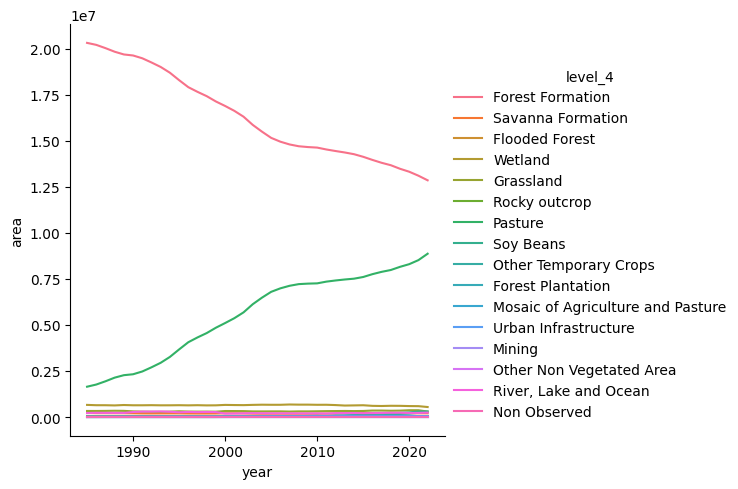

In [34]:
#Vamos plotar um gráfico

fig= sns.relplot(data= resultado_query,
                 x='year',
                 y='area',
                 hue= 'level_4',
                 kind= 'line')

plt.show()